# Transiting exoplanets

In [1]:
%pip install -e ../

Obtaining file:///home/jovyan/exoplanet_TA_testing
  Preparing metadata (setup.py) ... done
  Attempting uninstall: exoplanet_lecture_utils
    Found existing installation: exoplanet_lecture_utils 0.0.1
    Uninstalling exoplanet_lecture_utils-0.0.1:
      Successfully uninstalled exoplanet_lecture_utils-0.0.1
  DEPRECATION: Legacy editable install of exoplanet_lecture_utils==0.0.1 from file:///home/jovyan/exoplanet_TA_testing (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for exoplanet_lecture_utils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Part 1 - Statistics

In [4]:
# get data
pnasa = pd.read_csv('https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/nasa_exoplanet_archive_all_columns.csv')
list(pnasa)

['Unnamed: 0',
 'pl_name',
 'hostname',
 'discoverymethod',
 'pl_orbper',
 'pl_orbsmax',
 'pl_rade',
 'pl_radj',
 'pl_bmassj',
 'pl_bmasse',
 'pl_dens',
 'pl_orbeccen',
 'pl_insol',
 'pl_eqt',
 'pl_orbincl',
 'pl_tranmid',
 'pl_imppar',
 'pl_trandep',
 'pl_trandur',
 'pl_rvamp',
 'st_spectype',
 'st_teff',
 'st_rad',
 'st_mass',
 'st_met',
 'st_metratio',
 'st_logg',
 'st_age',
 'st_vsin',
 'st_radv',
 'sy_pm',
 'sy_dist',
 'sy_plx']

/tmp/ipykernel_514/3945601256.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


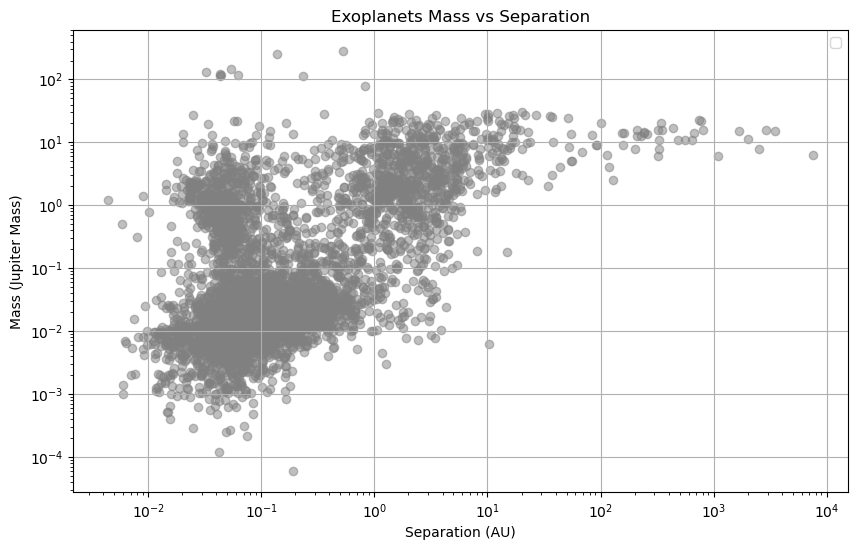

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(pnasa['pl_orbsmax'], pnasa['pl_bmassj'], alpha=0.5, color='grey')

# Highlight transiting planets

plt.legend()
plt.title("Exoplanets Mass vs Separation")
plt.ylabel("Mass (Jupiter Mass)")
plt.xlabel("Separation (AU)")
plt.yscale("log")
plt.xscale("log")
plt.grid(True)

In [ ]:
# Note: 'pl_rade' is the column header for the radius data (in units Earth radii)

## Part 2 - Transit fitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.modeling.models import Linear1D
from astropy.modeling.fitting import LevMarLSQFitter, LinearLSQFitter
from scipy.optimize import minimize
import h5py
import batman

In [5]:
# example batman model
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.51087081                      #orbital period
params.rp = 0.09689*const.R_jup/(0.117*const.R_sun)                   #planet radius (in units of stellar radii)
params.a = 0.01111*u.AU/(0.117*const.R_sun)                       #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.1, 0.]      #limb darkening coefficients [u1, u2, u3, u4]

t = np.linspace(-0.01, 0.01, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

Text(0.5, 0, 'time [days]')

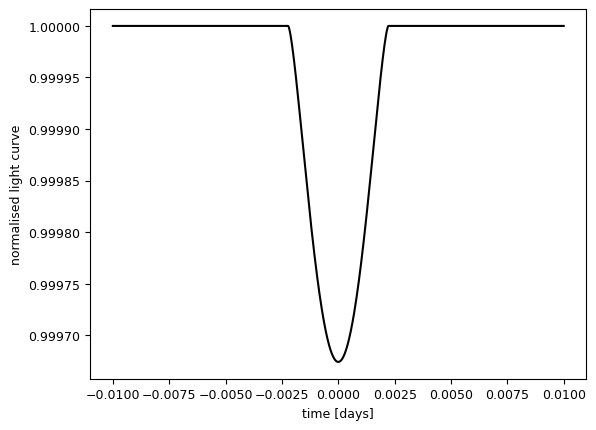

In [6]:
light_curve = m.light_curve(params) 
plt.figure()
plt.plot(t, light_curve, "black")
plt.ylabel("normalised light curve")
plt.xlabel("time [days]")

Text(0.5, 0, 'time [days]')

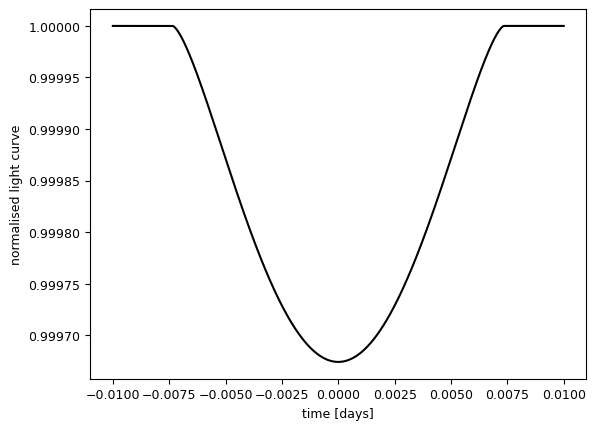

In [7]:
# update parameter eg. period
params.per = 5.0

# recalculate the ligth curve fit from batman
light_curve = m.light_curve(params) 

# plot
plt.figure()
plt.plot(t, light_curve, "black")
plt.ylabel("normalised light curve")
plt.xlabel("time [days]")

### 2.2 WASP-39 b

In [2]:
! wget https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/firefly_normalized_specphot.h5
# Only run this cell once, it will fetch the data and copy it to the directory here - you should see it the sidebar.


--2025-03-18 15:39:11--  https://share.phys.ethz.ch/~ipa/exoplanet_lecture_FS24/firefly_normalized_specphot.h5
Resolving share.phys.ethz.ch (share.phys.ethz.ch)... 129.132.80.27, 2001:67c:10ec:3dc4::39
Connecting to share.phys.ethz.ch (share.phys.ethz.ch)|129.132.80.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88066048 (84M)
Saving to: ‘firefly_normalized_specphot.h5’

firefly_normalized_ 100%[===================>]  83.99M   245MB/s    in 0.3s    

2025-03-18 15:39:11 (245 MB/s) - ‘firefly_normalized_specphot.h5’ saved [88066048/88066048]



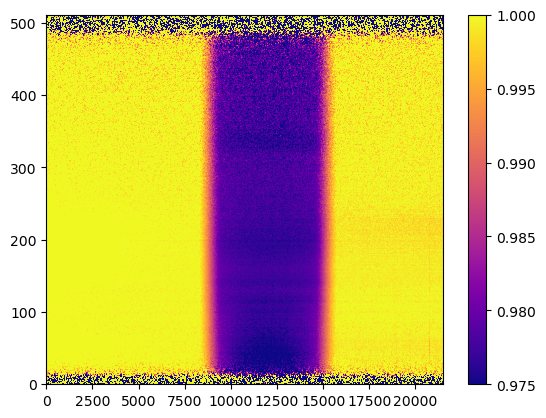

In [2]:
# load data
filename = "firefly_normalized_specphot.h5"
with h5py.File(filename, "r") as file:
    data = file["specphot"][()]

# Visualise the data 
# (Note: if this makes the Kernel crash then just re-import the python packages and try this cell again)
plt.figure()
plt.imshow(data, aspect="auto", origin="lower", vmax=1., vmin=0.975, cmap="plasma")
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Wavelength')

In [5]:
# Note: the integration time of each exposure was 1.36 seconds
time = np.arange(data.shape[1])*1.36/3600 # time in hrs now

# Average over the wavelength axis to obtain the white light curve and plot against time